# Nalezení kořene transcendentní rovnice

Chceme vyřešit následující slovní úlohu:

Na jak dlouhém provaze musí být uvázána koza, aby mohla spást polovinu kruhové louky o poloměru $R$, je-li uvázána na obvodu kružnice louku ohraničující.

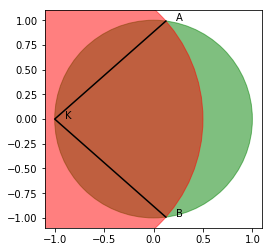

In [17]:
import matplotlib.pyplot as plt # vykreslime situaci s prozatimni hodnotou `delka_provazu`

delka_provazu = 1.5
x_prusecik = (delka_provazu**2-2)/2
y_prusecik = (1-x_prusecik**2)**(1/2)

louka = plt.Circle((0, 0), 1, color='green',alpha=0.5)
dosah_kozy = plt.Circle((-1, 0),delka_provazu, color='red',alpha=0.5)

fig, ax = plt.subplots()

ax.set_xlim((-1.1, 1.1))
ax.set_ylim((-1.1, 1.1))
ax.set_aspect('equal')
ax.add_artist(louka)
ax.add_artist(dosah_kozy)

X=[x_prusecik,-1,x_prusecik]
Y=[y_prusecik,0,-y_prusecik]
popisky=["A","K","B"]

plt.plot(X,Y,'black')

k=0
for i,j in zip(X,Y):
    ax.annotate(popisky[k], xy=(i,j),xytext=(10,0),textcoords='offset points')
    k+=1
    
plt.show()

Úloha vede na transcendentní rovnici pro úhel $\varphi = \angle AKB$, pomocí něhož lze pak spočíst i poměr délky provazu a poloměru louky jako $2\cos \varphi/2$. Tuto níže uvedenou rovnici musíme vyřešit numericky.
$$
\sin \varphi -\varphi\cos\varphi = \pi/2
$$
SciPy naštěstí obsahuje knihovnu na hledání nulového bodu funkce. Nám bude stačit metoda půlení intervalu.

In [8]:
from scipy.optimize import bisect # import funkce `bisect` na hledani korene 
import numpy as np

In [10]:
def fn(fi):
    return np.sin(fi)-fi*np.cos(fi)-np.pi/2 # definice funkce

koren = bisect(fn,0.5*np.pi,np.pi,full_output=True) # hledani korene

print(koren) # vypis s vysledkem a prubehem hledani

(1.9056957293099803,       converged: True
           flag: 'converged'
 function_calls: 43
     iterations: 41
           root: 1.9056957293099803)


In [20]:
delka_provazu = 2*np.cos(koren[0]/2) # vypocet delky provazu
print("\x1b[31m",delka_provazu,"\x1b[0m") # tisk vysledku cervene

 1.15872847302 


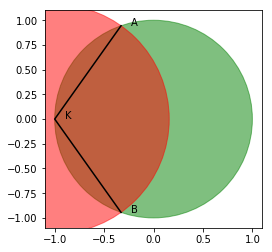

In [16]:
x_prusecik = (delka_provazu**2-2)/2
y_prusecik = (1-x_prusecik**2)**(1/2)

louka = plt.Circle((0, 0), 1, color='green',alpha=0.5)
dosah_kozy = plt.Circle((-1, 0),delka_provazu, color='red',alpha=0.5)

fig, ax = plt.subplots()

ax.set_xlim((-1.1, 1.1))
ax.set_ylim((-1.1, 1.1))
ax.set_aspect('equal')
ax.add_artist(louka)
ax.add_artist(dosah_kozy)

X=[x_prusecik,-1,x_prusecik]
Y=[y_prusecik,0,-y_prusecik]
popisky=["A","K","B"]

plt.plot(X,Y,'black')

k=0
for i,j in zip(X,Y):
    ax.annotate(popisky[k], xy=(i,j),xytext=(10,0),textcoords='offset points')
    k+=1
    
plt.show()